/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Supervised Fine-Tuned Model Accuracy: 46.11%
              precision    recall  f1-score   support

           0       0.36      0.58      0.44        53
           1       0.43      0.12      0.19        50
           2       0.39      0.87      0.54        47
           3       0.47      0.13      0.20        54
           4       0.65      1.00      0.79        60
           5       0.47      0.14      0.21        66
           6       0.63      0.51      0.56        53
           7       0.42      0.85      0.56        55
           8       0.00      0.00      0.00        43
           9       0.49      0.36      0.41        59

    accuracy                           0.46       540
   macro avg       0.43      0.46      0.39       540
weighted avg       0.44      0.46      0.40       540



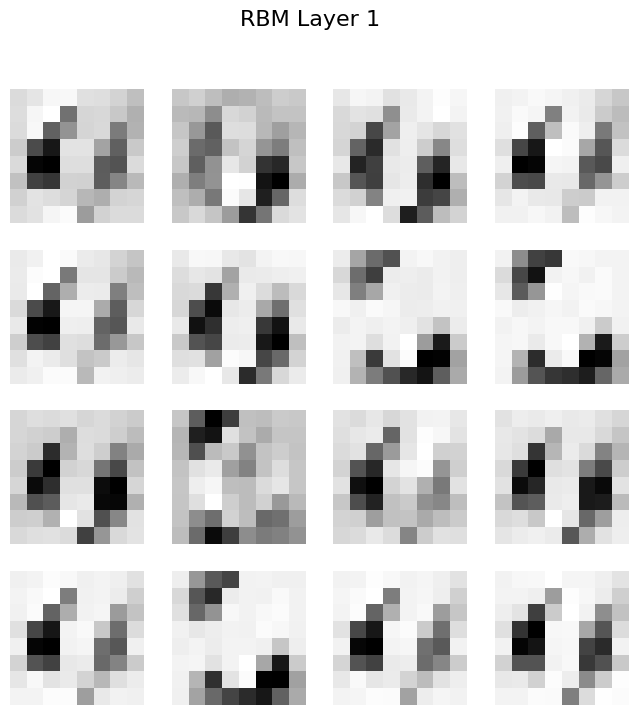

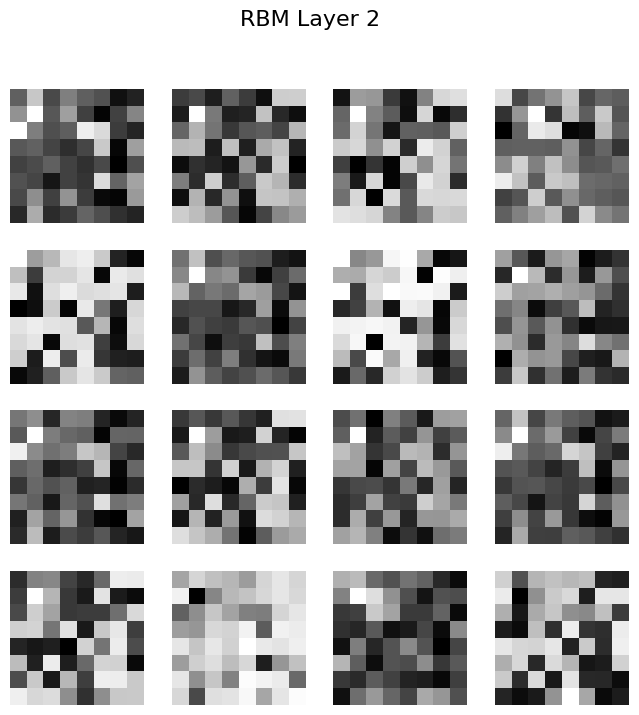

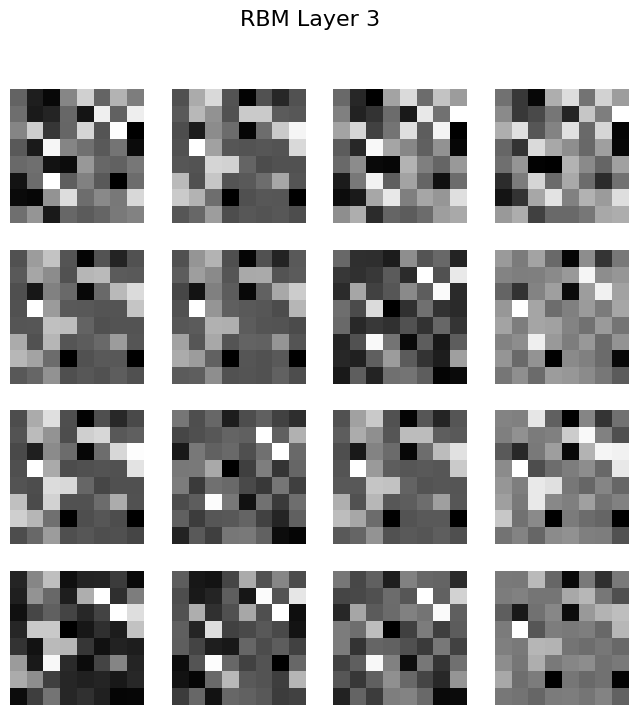

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
def train_stacked_rbms(X_train, n_layers=3, n_components=64, n_iter=10):
    rbms = []
    current_input = X_train
    for layer in range(n_layers):
        rbm = BernoulliRBM(n_components=n_components, n_iter=n_iter, random_state=42)
        rbm.fit(current_input)
        rbms.append(rbm)


        current_input = rbm.transform(current_input)

    return rbms
def fine_tune_with_supervision(X_train, y_train, X_test, y_test, rbms, classifier=MLPClassifier()):

    current_input = X_train
    for rbm in rbms:
        current_input = rbm.transform(current_input)


    classifier.fit(current_input, y_train)

    current_input_test = X_test
    for rbm in rbms:
        current_input_test = rbm.transform(current_input_test)


    y_pred = classifier.predict(current_input_test)
    accuracy = classifier.score(current_input_test, y_test)


    print(f"Supervised Fine-Tuned Model Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    return classifier


def plot_rbms(rbms):
    for i, rbm in enumerate(rbms):
        #
        plt.figure(figsize=(8, 8))
        plt.suptitle(f"RBM Layer {i + 1}", size=16)
        for j in range(min(16, rbm.components_.shape[0])):
            plt.subplot(4, 4, j + 1)
            plt.imshow(rbm.components_[j].reshape(8, 8), cmap=plt.cm.gray)
            plt.axis('off')
        plt.show()


n_layers = 3
rbms = train_stacked_rbms(X_train, n_layers=n_layers, n_components=64, n_iter=10)


classifier = fine_tune_with_supervision(X_train, y_train, X_test, y_test, rbms)


plot_rbms(rbms)